# Climate Change Explorer

##### ClimateChangeExplorer is a data analysis project focusing on global climate trends from 1961 to 2022, with predictive insights up to 2050. Leveraging Jupyter Notebooks, it offers data cleaning, visualization, and predictive modeling for understanding and forecasting climate change dynamics.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Data exploration
### Visualization of my DataFrame:
- ObjectId: A unique identifier for each row in the table.
- Country: The name of the country.
- ISO2: The 2-letter ISO code of the country.
- ISO3: The 3-letter ISO code of the country.
- Indicator: Describes the type of climate indicator, in this case, 'Temperature change with respect to a baseline climatology, corresponding to the period 1951-1980'.
- Unit: The unit in which the indicator is measured, in this case, degrees Celsius.
- Source: The source of the data.
- CTS_Code: Code related to surface temperature change.
- CTS_Name: Name related to surface temperature change.
- CTS_Full_Descriptor: Complete description of surface temperature change.
- F1961 to F2022: Columns representing temperature changes for each year from 1961 to 2022.

In [2]:
df = pd.read_csv('climate_change_indicators.csv')

In [3]:
df.head()

,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
0,1,"Afghanistan, Islamic Rep. of",AF,AFG,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.281,0.456,1.093,1.555,1.540,1.544,0.910,0.498,1.327,2.012
1,2,Albania,AL,ALB,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.333,1.198,1.569,1.464,1.121,2.028,1.675,1.498,1.536,1.518
2,3,Algeria,DZ,DZA,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.192,1.690,1.121,1.757,1.512,1.210,1.115,1.926,2.330,1.688
3,4,American Samoa,AS,ASM,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.257,1.170,1.009,1.539,1.435,1.189,1.539,1.430,1.268,1.256
4,5,"Andorra, Principality of",AD,AND,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,0.831,1.946,1.690,1.990,1.925,1.919,1.964,2.562,1.533,3.243


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 72 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ObjectId             225 non-null    int64  
 1   Country              225 non-null    object 
 2   ISO2                 223 non-null    object 
 3   ISO3                 225 non-null    object 
 4   Indicator            225 non-null    object 
 5   Unit                 225 non-null    object 
 6   Source               225 non-null    object 
 7   CTS_Code             225 non-null    object 
 8   CTS_Name             225 non-null    object 
 9   CTS_Full_Descriptor  225 non-null    object 
 10  F1961                188 non-null    float64
 11  F1962                189 non-null    float64
 12  F1963                188 non-null    float64
 13  F1964                188 non-null    float64
 14  F1965                188 non-null    float64
 15  F1966                192 non-null    flo

In [5]:
df.describe()

,ObjectId,F1961,F1962,F1963,F1964,F1965,F1966,F1967,F1968,F1969,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
count,225.000000,188.000000,189.000000,188.000000,188.000000,188.000000,192.000000,191.000000,191.000000,190.000000,...,216.000000,216.000000,216.000000,213.000000,214.000000,213.000000,213.000000,212.000000,213.000000,213.000000
mean,113.000000,0.163053,-0.013476,-0.006043,-0.070059,-0.247027,0.105505,-0.110832,-0.199110,0.157942,...,0.931199,1.114815,1.269773,1.439521,1.280785,1.302113,1.443061,1.552038,1.343531,1.382113
std,65.096083,0.405080,0.341812,0.387348,0.309305,0.270734,0.378423,0.339484,0.270131,0.308540,...,0.321595,0.564903,0.462162,0.401091,0.393999,0.596786,0.467510,0.621930,0.484692,0.669279
min,1.000000,-0.694000,-0.908000,-1.270000,-0.877000,-1.064000,-1.801000,-1.048000,-1.634000,-0.900000,...,0.118000,-0.092000,-0.430000,0.250000,0.017000,0.238000,0.050000,0.229000,-0.425000,-1.305000
25%,57.000000,-0.097000,-0.164000,-0.205500,-0.236500,-0.392500,-0.035750,-0.259500,-0.340000,-0.009000,...,0.743500,0.744000,1.017750,1.147000,1.027500,0.865000,1.169000,1.161750,1.019000,0.878000
50%,113.000000,0.064500,-0.056000,-0.003000,-0.056000,-0.230500,0.098000,-0.146000,-0.187000,0.204000,...,0.897000,0.986500,1.215000,1.446000,1.282000,1.125000,1.412000,1.477000,1.327000,1.315000
75%,169.000000,0.318500,0.114000,0.230500,0.132500,-0.091500,0.277000,0.015000,-0.067000,0.349000,...,1.187500,1.335500,1.520500,1.714000,1.535000,1.834000,1.698000,1.826250,1.629000,1.918000
max,225.000000,1.892000,0.998000,1.202000,1.097000,0.857000,1.151000,1.134000,0.476000,0.939000,...,1.643000,2.704000,2.613000,2.459000,2.493000,2.772000,2.689000,3.691000,2.676000,3.243000


## Data cleaning and transformation
####
- Dropping duplicate values (no duplicate values exist).
- Transformation of year columns (remove 'F' from column names).
- Handling null values (transform null values to the mean, avoid data loss).

In [6]:
df.shape

(225, 72)

In [7]:
column_names= df.columns
new_column_names = {col: col[1:] for col in column_names if col.startswith('F')}
df.rename(columns=new_column_names, inplace=True)

In [8]:
df.drop_duplicates()

,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,1,"Afghanistan, Islamic Rep. of",AF,AFG,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.281,0.456,1.093,1.555,1.540,1.544,0.910,0.498,1.327,2.012
1,2,Albania,AL,ALB,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.333,1.198,1.569,1.464,1.121,2.028,1.675,1.498,1.536,1.518
2,3,Algeria,DZ,DZA,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.192,1.690,1.121,1.757,1.512,1.210,1.115,1.926,2.330,1.688
3,4,American Samoa,AS,ASM,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.257,1.170,1.009,1.539,1.435,1.189,1.539,1.430,1.268,1.256
4,5,"Andorra, Principality of",AD,AND,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,0.831,1.946,1.690,1.990,1.925,1.919,1.964,2.562,1.533,3.243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,221,Western Sahara,EH,ESH,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.423,1.401,1.510,1.732,2.204,0.942,1.477,2.069,1.593,1.970
221,222,World,NaN,WLD,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.016,1.053,1.412,1.660,1.429,1.290,1.444,1.711,1.447,1.394
222,223,"Yemen, Rep. of",YE,YEM,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
223,224,Zambia,ZM,ZMB,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,0.790,0.917,1.450,1.401,0.105,0.648,0.855,0.891,0.822,0.686


In [9]:
df_notnull = df.dropna()

In [10]:
df_notnull.shape

(156, 72)

In [11]:
df.isnull().sum()

ObjectId      0
Country       0
ISO2          2
ISO3          0
Indicator     0
             ..
2018         12
2019         12
2020         13
2021         12
2022         12
Length: 72, dtype: int64

In [12]:
df=df.drop('ISO2', axis=1)

In [13]:
columns_float = df.select_dtypes(include='float64').columns

In [14]:
for column in columns_float:
    mean_column = df[column].mean()
    df[column] = df[column].fillna(mean_column)

In [15]:
df.isnull().sum()

ObjectId     0
Country      0
ISO3         0
Indicator    0
Unit         0
            ..
2018         0
2019         0
2020         0
2021         0
2022         0
Length: 71, dtype: int64

In [16]:
df.shape

(225, 71)

In [17]:
df.head()

,ObjectId,Country,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,1961,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,1,"Afghanistan, Islamic Rep. of",AFG,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",-0.113,...,1.281,0.456,1.093,1.555,1.540,1.544,0.910,0.498,1.327,2.012
1,2,Albania,ALB,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",0.627,...,1.333,1.198,1.569,1.464,1.121,2.028,1.675,1.498,1.536,1.518
2,3,Algeria,DZA,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",0.164,...,1.192,1.690,1.121,1.757,1.512,1.210,1.115,1.926,2.330,1.688
3,4,American Samoa,ASM,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",0.079,...,1.257,1.170,1.009,1.539,1.435,1.189,1.539,1.430,1.268,1.256
4,5,"Andorra, Principality of",AND,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",0.736,...,0.831,1.946,1.690,1.990,1.925,1.919,1.964,2.562,1.533,3.243


## Descriptive statistics

### Exploratory data analysis
- I work with numerical data and give them appropriate formatting.
- I obtain a single mean for the data in order to understand the trends.

     - General Mean: The overall mean of climate change is approximately 0.5133 degrees Celsius. This indicates that, on average, there has been an increase in global temperature compared to the reference period.
    - General Mode: The overall mode is around 0.1658 degrees Celsius. This suggests that the most commonly observed temperature is around 0.1658 degrees Celsius. While it may not be the most representative temperature of the sample, it shows the central tendency of the most frequent values.
    - General Median: The overall median is 0.4255 degrees Celsius. The median is useful because it is not affected by extreme or outlier values in the data. It indicates that the midpoint of the climate change values is around 0.4255 degrees Celsius.
- The graphs show a clear trend towards increasing temperatures in recent years.

In [18]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df.describe()

,ObjectId,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
count,225.00,225.00,225.00,225.00,225.00,225.00,225.00,225.00,225.00,225.00,...,225.00,225.00,225.00,225.00,225.00,225.00,225.00,225.00,225.00,225.00
mean,113.00,0.16,-0.01,-0.01,-0.07,-0.25,0.11,-0.11,-0.20,0.16,...,0.93,1.11,1.27,1.44,1.28,1.30,1.44,1.55,1.34,1.38
std,65.10,0.37,0.31,0.35,0.28,0.25,0.35,0.31,0.25,0.28,...,0.32,0.55,0.45,0.39,0.38,0.58,0.45,0.60,0.47,0.65
min,1.00,-0.69,-0.91,-1.27,-0.88,-1.06,-1.80,-1.05,-1.63,-0.90,...,0.12,-0.09,-0.43,0.25,0.02,0.24,0.05,0.23,-0.42,-1.30
25%,57.00,-0.07,-0.14,-0.17,-0.21,-0.36,-0.01,-0.25,-0.29,0.02,...,0.75,0.76,1.03,1.16,1.04,0.88,1.18,1.19,1.03,0.89
50%,113.00,0.15,-0.02,-0.01,-0.07,-0.25,0.11,-0.11,-0.20,0.16,...,0.92,1.01,1.23,1.44,1.28,1.15,1.44,1.50,1.34,1.35
75%,169.00,0.25,0.08,0.17,0.10,-0.11,0.24,-0.04,-0.10,0.30,...,1.18,1.31,1.52,1.69,1.51,1.61,1.68,1.78,1.60,1.86
max,225.00,1.89,1.00,1.20,1.10,0.86,1.15,1.13,0.48,0.94,...,1.64,2.70,2.61,2.46,2.49,2.77,2.69,3.69,2.68,3.24


In [19]:
df=df.drop('ObjectId', axis=1)

In [20]:
columns_float = df.select_dtypes(include='float64')


In [21]:
columns_float_numeric = columns_float.apply(pd.to_numeric, errors='coerce')

In [22]:
mean_general = columns_float_numeric.stack().mean()
mode_general = pd.Series(columns_float_numeric.stack()).mode()[0]
median_general = pd.Series(columns_float_numeric.stack()).median()

In [23]:
print(f"Mean general: {mean_general}")
print(f"Mode general: {mode_general}")
print(f"Median general: {median_general}")

Mean general: 0.5133257312792895
Mode general: 0.1658162162162162
Median general: 0.4255


In [24]:
mean_by_year = columns_float.mean(axis=0)

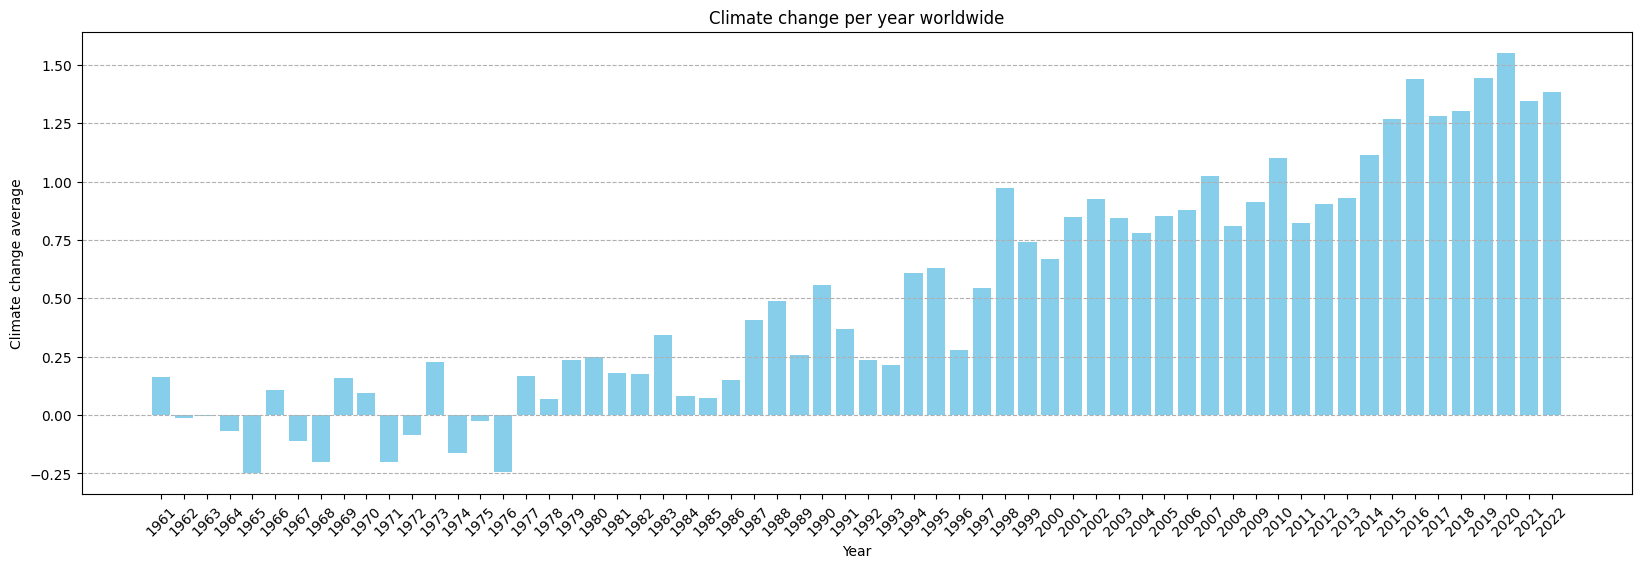

In [25]:
plt.figure(figsize=(20, 6))
plt.bar(mean_by_year.index, mean_by_year.values, color='skyblue')
plt.title('Climate change per year worldwide')
plt.xlabel('Year')
plt.ylabel('Climate change average')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()

In [26]:
labels = columns_float_numeric.columns

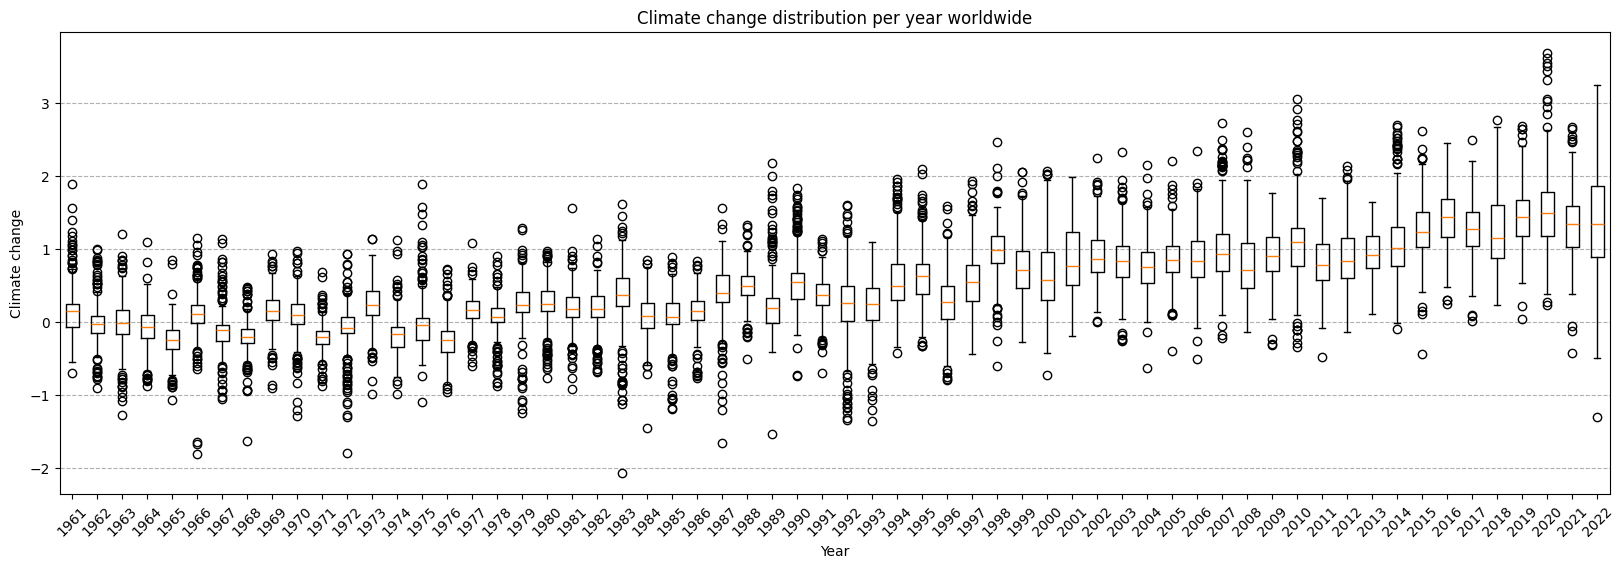

In [27]:
plt.figure(figsize=(20, 6))
plt.boxplot(columns_float_numeric.values, labels=labels)
plt.title('Climate change distribution per year worldwide')
plt.xlabel('Year')
plt.ylabel('Climate change')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()

### Measures of Dispersion
- General Maximum Range: It is useful for understanding the breadth of the observed values.
- Maximum Variance: The maximum variance is approximately 0.4239 square degrees Celsius. Variance measures how spread out the values are relative to the mean. A high variance indicates greater data dispersion around the mean.
- Maximum Standard Deviation: The maximum standard deviation is approximately 0.6511 degrees Celsius. A high standard deviation indicates greater data dispersion relative to the mean.

"These measures of dispersion show that there is considerable variability in the climate change data over time, suggesting that climate changes are not consistent and can be quite significant at times. This highlights the importance of considering variability and not just measures of central tendency when analyzing climate data."

In [28]:
range= columns_float.max() - columns_float.min()
print(range)

1961   2.59
1962   1.91
1963   2.47
1964   1.97
1965   1.92
       ... 
2018   2.53
2019   2.64
2020   3.46
2021   3.10
2022   4.55
Length: 62, dtype: float64


In [29]:
range_general = range.max()
print(range_general)

4.548


In [30]:
columns_float.var().max()

0.42393784507042254

In [31]:
columns_float.std().max()

0.6511050952576108

### Correlation
#### In the correlation plot, it is observed that the values are generally close to 0 or -0 before 1999 and then tend to be closer to 0 and 1 after that year. This may indicate a change in temperature trends over time.
- Hypothesis of Climate Change: The shift in the distribution of temperature values after 1999 could be indicative of ongoing climate change. Values closer to 0 and 1 might reflect an increase in average temperatures and greater variability in recorded temperatures.


In [32]:
columns_year = df.filter(regex=r'^\d{4}$', axis=1)

In [33]:
df_new= df[columns_year.columns].copy()

In [34]:
df_new.head()

,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,-0.11,-0.16,0.85,-0.76,-0.24,0.23,-0.37,-0.42,-0.54,0.81,...,1.28,0.46,1.09,1.55,1.54,1.54,0.91,0.50,1.33,2.01
1,0.63,0.33,0.07,-0.17,-0.39,0.56,-0.07,0.08,-0.01,-0.11,...,1.33,1.20,1.57,1.46,1.12,2.03,1.68,1.50,1.54,1.52
2,0.16,0.11,0.08,0.25,-0.10,0.43,-0.03,-0.07,0.29,0.12,...,1.19,1.69,1.12,1.76,1.51,1.21,1.11,1.93,2.33,1.69
3,0.08,-0.04,0.17,-0.14,-0.56,0.18,-0.37,-0.19,0.13,-0.05,...,1.26,1.17,1.01,1.54,1.44,1.19,1.54,1.43,1.27,1.26
4,0.74,0.11,-0.75,0.31,-0.49,0.41,0.64,0.02,-0.14,0.12,...,0.83,1.95,1.69,1.99,1.93,1.92,1.96,2.56,1.53,3.24


In [35]:
df_new.quantile(0.25).mean()

0.30609677419354836

In [36]:
df_new.quantile(0.5).mean()

0.49509436541016033

In [37]:
df_new.quantile(0.75).mean()

0.7064193548387095

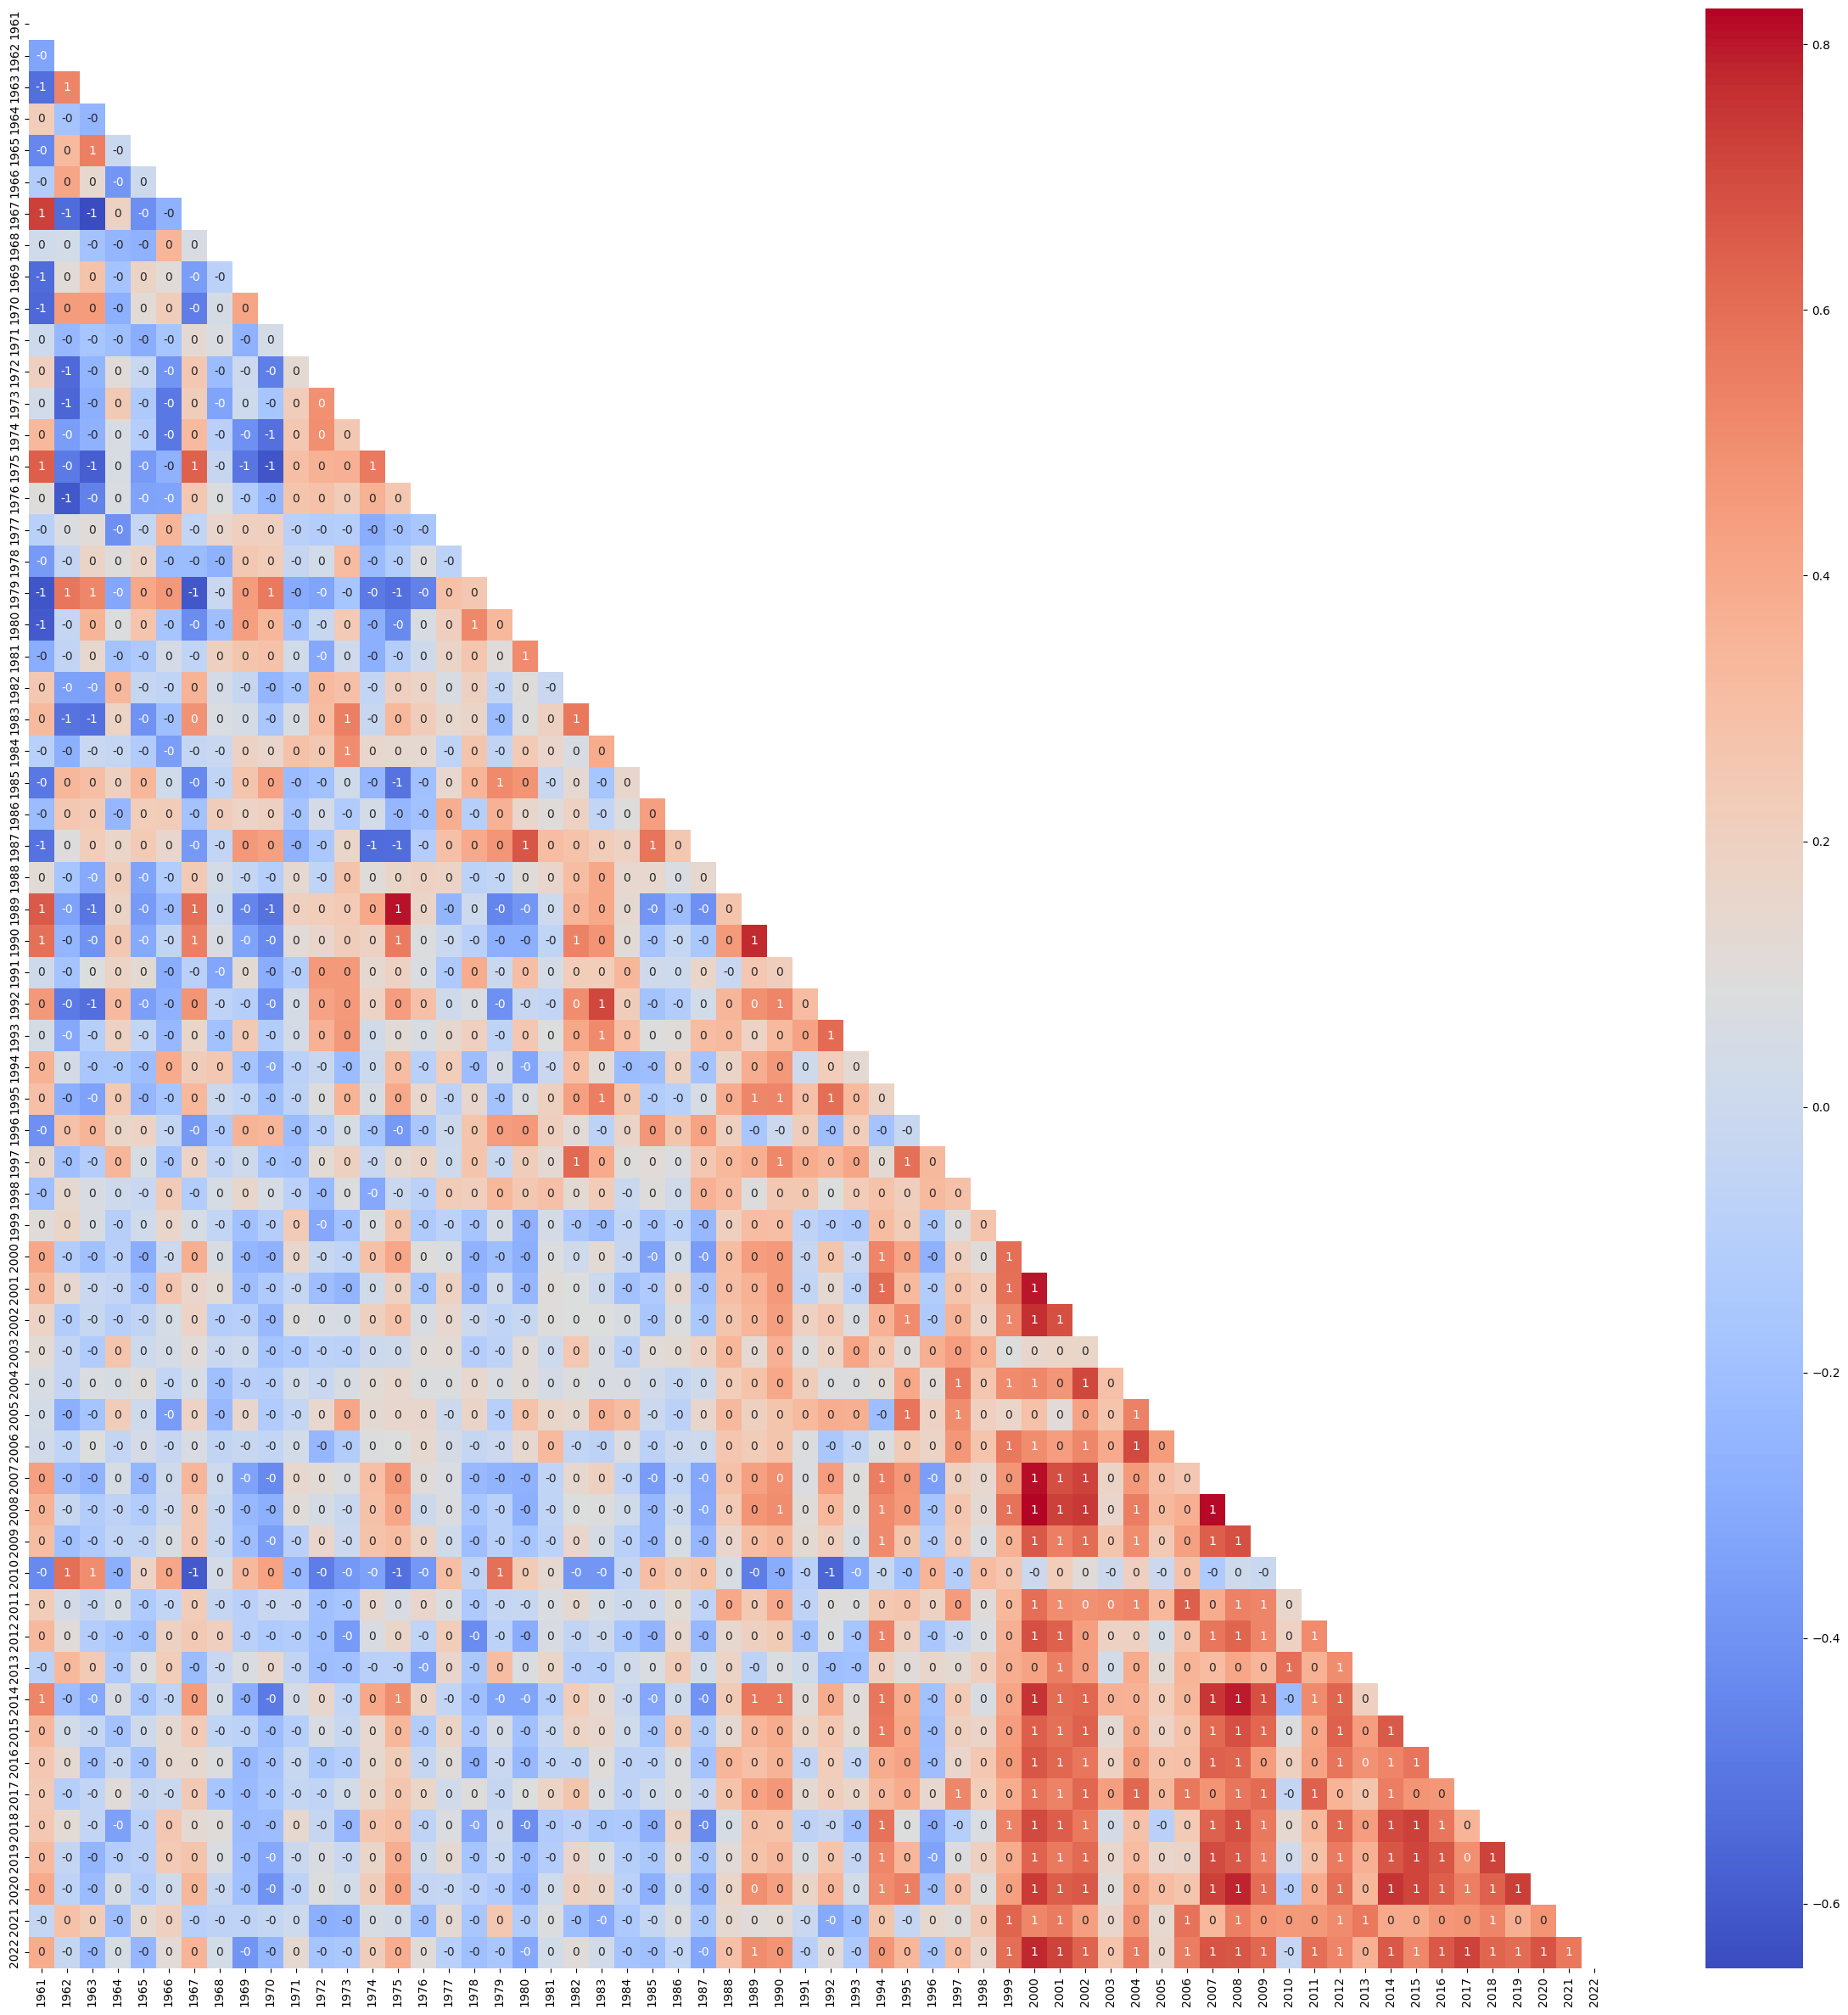

In [38]:
correlation_matrix = df_new.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(30, 30))
sns.heatmap(correlation_matrix, mask=mask, cmap='coolwarm', fmt=".0f", annot=True)
plt.show()

## Interactive visualization
- I create graphs with the Plotly library that show quite interesting data. We can see in the box plot how the values tend to approach the mean, reducing the outliers. And in the following scatter plots, we observe a notable trend towards increasing temperatures worldwide.


In [39]:
fig = px.box(columns_float_numeric, labels={"value": "Value"})
fig.update_layout(title='Box plot showing the trend of temperature change each year')
fig.show()

In [40]:
fig = px.scatter(df, x="1961", y="Country", color ="1961")
fig.update_layout(title='Scatter plot showing the variance of temperature in 1961 in each country')
fig.show()

In [41]:
fig = px.scatter(df, x="1996", y="Country", color ="1996")
fig.update_layout(title='Scatter plot showing the variance of temperature in 1996 in each country')
fig.show()

In [42]:
fig = px.scatter(df, x="2000", y="Country", color ="2000")
fig.update_layout(title='Scatter plot showing the variance of temperature in 2000 in each country')
fig.show()

In [43]:
fig = px.scatter(df, x="2022", y="Country", color ="2022")
fig.update_layout(title='Scatter plot showing the variance of temperature in 2022 in each country')
fig.show()